In [4]:
#!pip install geopandas

In [6]:
import os
import time
from datetime import date, timedelta

import pandas as pd
import numpy as np

import requests 
from bs4 import BeautifulSoup

import io
import re
import itertools
import zipfile

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gp
import numpy as np
import sys

from matplotlib import cm
import geopandas

In [7]:
pays = pd.read_excel("PaysdAfrique.xlsx")

In [8]:
pays.head()

,Northern Africa (210 002 000),West Africa (331 255 000),Central Africa (135 750 000),East Africa (373 202 000),Southern Africa (60 425 000)
0,Maroc (35 280 451),Mauritanie (4 166 000),Tchad (14 485 740),Erythree (5 351 000),Namibie (2 513 000)
1,Algerie (40 610 154),Senegal (15 580 485),Centrafrique (4 998 000),Ethiopie (101 850 000),Botswana (2 3003 000)
2,Tunise (11 411 212),Gambie (2 054 000),Cameroun (23 920 400),Ouganda (41 175 440),Afrique du sud (54 975 900)
3,Libye(6 330 000),Guinee Bissau (1 888 000),Guinee Equatoriale (869 000),Kenya (47 450 250),Swaziland (1 220 000)
4,Egypte (93 380 570),Guinee (12 940 000),Gabon (1 763 000),Djibouti (899 000),Lesotho (2 160 000)


In [9]:
evolution = pd.read_excel("regionsAfrique.xlsx")

In [10]:
evolution.head()

,Region,B_C2002,B_C2008,B_C2012,BC_2018,B_C2002Mort,B_C2008Mort,B_C2012Mort,BC_2018Mort,Unnamed: 9,Cervix2002,Cervix2008,Cervix2012,Cervix2018,Cervix2002Mort,Cervix2008Mort,Cervix2012Mort,Cervix2018Mort,Unnamed: 18,Prost2002,Prost2008,Prost2012,Prost2018,Prost2002Mort,Prost2008Mort,Prost2012Mort,Prost2018Mort,Unnamed: 27,Lung_C2M,Lung_C2F,Lung_C8M,Lung_C8F,Lung_C12M,Lung_C12F,Lung_C18M,Lung_C18F,Unnamed: 36,St_C2M,St_C2F,St_C8M,...,Cr_C12M,Cr_C12F,Cr_C18M,Cr_C18F,Unnamed: 54,Es_C2M,Es_C2F,Es_C8M,Es_C8F,Es_C12M,Es_C12F,Es_C18M,Es_C18F,Unnamed: 63,Liver 2002 M,Liver 2002 F,Liver 2008 M,Liver 2008 F,Liver 2012 M,Liver 2012 F,Liver 2018 M,Liver 2018 F,Unnamed: 72,Bladder 2002 M,Bladder 2002 F,Bladder 2008 M,Bladder 2008 F,Bladder 2012 M,Bladder 2012 F,Bladder 2018 M,Bladder 2018 F,Unnamed: 81,Thyroid 2002 M,Thyroid 2002 F,Thyroid 2008 M,Thyroid 2008 F,Thyroid 2012 M,Thyroid 2012 F,Thyroid 2018 M,Thyroid 2018 F
0,North,23.2,32.7,43.2,48.9,16.7,17.8,17.4,18.4,NaN,12.1,6.6,6.6,7.2,9.8,4.0,3.2,5.1,NaN,5.8,8.1,10.6,13.2,4.9,6.2,7.0,5.8,NaN,12.0,2.2,14.9,2.2,15.6,3.1,16.9,3.4,NaN,4.4,2.5,3.9,...,8.5,6.9,9.5,8.2,NaN,2.1,1.4,2.0,1.6,2.4,1.5,1.7,1.4,NaN,4.2,2.2,7.5,2.5,18.0,7.0,20.8,7.8,NaN,20.3,3.6,NaN,NaN,15.1,3.2,14.3,3.2,NaN,NaN,NaN,NaN,NaN,1.4,4.4,1.6,5.7
1,West,27.8,31.8,38.6,37.3,19.6,19.0,20.1,17.8,NaN,29.3,33.7,29.3,29.6,23.8,24.0,18.5,23.0,NaN,19.3,22.2,25.1,31.9,16.0,18.3,21.2,18.6,NaN,2.4,0.6,3.1,1.2,1.7,1.1,2.4,1.2,NaN,3.4,3.6,4.5,...,4.5,3.8,6.0,5.1,NaN,1.3,0.6,1.4,1.0,0.8,0.4,1.6,0.8,NaN,15.3,5.6,16.5,8.1,16.4,8.1,11.1,5.7,NaN,4.0,1.4,NaN,NaN,2.1,1.3,2.3,1.4,NaN,NaN,NaN,NaN,NaN,0.3,1.0,0.5,1.5
2,Central,16.5,21.3,26.8,27.9,12.1,13.1,14.9,15.8,NaN,28.0,23.0,30.6,26.8,23.0,17.0,22.2,21.1,NaN,24.5,16.4,27.0,35.9,21.1,13.4,24.2,22.7,NaN,4.7,0.7,2.8,0.9,2.0,0.8,3.8,2.3,NaN,13.4,12.6,5.3,...,4.7,4.8,6.6,6.1,NaN,1.5,0.2,1.5,0.8,4.2,2.0,2.1,1.7,NaN,27.8,13.4,18.9,9.6,10.5,5.7,9.4,3.9,NaN,1.9,0.5,NaN,NaN,2.2,1.3,1.3,1.0,NaN,NaN,NaN,NaN,NaN,0.7,1.2,0.8,1.3
3,East,19.5,19.3,30.4,29.9,14.1,11.4,15.6,15.4,NaN,42.7,34.5,42.7,40.1,34.6,25.3,27.6,30.0,NaN,13.8,14.5,23.3,23.9,11.8,11.7,18.7,14.8,NaN,3.6,2.2,4.1,1.4,3.8,2.2,3.4,2.2,NaN,7.4,5.5,5.6,...,7.1,6.1,7.2,6.8,NaN,19.1,8.0,14.9,6.4,11.9,7.8,9.7,7.1,NaN,21.1,8.6,7.2,3.6,4.8,3.3,6.2,3.6,NaN,4.6,3.7,NaN,NaN,3.3,2.0,3.2,2.4,NaN,NaN,NaN,NaN,NaN,1.1,2.7,1.1,2.5
4,South,33.4,38.1,38.9,46.2,16.3,19.3,15.5,15.6,NaN,38.2,26.8,31.5,43.1,22.6,14.8,17.9,20.0,NaN,40.5,53.9,61.8,64.1,22.4,19.3,24.4,26.8,NaN,23.1,6.9,29.0,8.0,26.1,10.2,26.0,8.9,NaN,8.2,3.7,4.1,...,14.2,8.8,16.4,10.7,NaN,19.7,7.0,22.3,11.7,13.7,6.7,11.1,5.0,NaN,7.0,2.5,13.9,5.1,6.7,3.3,7.4,3.2,NaN,10.5,3.4,NaN,NaN,7.5,1.9,6.3,1.5,NaN,NaN,NaN,NaN,NaN,0.6,1.6,1.7,6.0


In [11]:
annee = ["2002","2008","2012","2018"]

In [12]:
index = ["North", "West", "Central", "East", "South"]
evolution.index = index
evolution

,Region,B_C2002,B_C2008,B_C2012,BC_2018,B_C2002Mort,B_C2008Mort,B_C2012Mort,BC_2018Mort,Unnamed: 9,Cervix2002,Cervix2008,Cervix2012,Cervix2018,Cervix2002Mort,Cervix2008Mort,Cervix2012Mort,Cervix2018Mort,Unnamed: 18,Prost2002,Prost2008,Prost2012,Prost2018,Prost2002Mort,Prost2008Mort,Prost2012Mort,Prost2018Mort,Unnamed: 27,Lung_C2M,Lung_C2F,Lung_C8M,Lung_C8F,Lung_C12M,Lung_C12F,Lung_C18M,Lung_C18F,Unnamed: 36,St_C2M,St_C2F,St_C8M,...,Cr_C12M,Cr_C12F,Cr_C18M,Cr_C18F,Unnamed: 54,Es_C2M,Es_C2F,Es_C8M,Es_C8F,Es_C12M,Es_C12F,Es_C18M,Es_C18F,Unnamed: 63,Liver 2002 M,Liver 2002 F,Liver 2008 M,Liver 2008 F,Liver 2012 M,Liver 2012 F,Liver 2018 M,Liver 2018 F,Unnamed: 72,Bladder 2002 M,Bladder 2002 F,Bladder 2008 M,Bladder 2008 F,Bladder 2012 M,Bladder 2012 F,Bladder 2018 M,Bladder 2018 F,Unnamed: 81,Thyroid 2002 M,Thyroid 2002 F,Thyroid 2008 M,Thyroid 2008 F,Thyroid 2012 M,Thyroid 2012 F,Thyroid 2018 M,Thyroid 2018 F
North,North,23.2,32.7,43.2,48.9,16.7,17.8,17.4,18.4,NaN,12.1,6.6,6.6,7.2,9.8,4.0,3.2,5.1,NaN,5.8,8.1,10.6,13.2,4.9,6.2,7.0,5.8,NaN,12.0,2.2,14.9,2.2,15.6,3.1,16.9,3.4,NaN,4.4,2.5,3.9,...,8.5,6.9,9.5,8.2,NaN,2.1,1.4,2.0,1.6,2.4,1.5,1.7,1.4,NaN,4.2,2.2,7.5,2.5,18.0,7.0,20.8,7.8,NaN,20.3,3.6,NaN,NaN,15.1,3.2,14.3,3.2,NaN,NaN,NaN,NaN,NaN,1.4,4.4,1.6,5.7
West,West,27.8,31.8,38.6,37.3,19.6,19.0,20.1,17.8,NaN,29.3,33.7,29.3,29.6,23.8,24.0,18.5,23.0,NaN,19.3,22.2,25.1,31.9,16.0,18.3,21.2,18.6,NaN,2.4,0.6,3.1,1.2,1.7,1.1,2.4,1.2,NaN,3.4,3.6,4.5,...,4.5,3.8,6.0,5.1,NaN,1.3,0.6,1.4,1.0,0.8,0.4,1.6,0.8,NaN,15.3,5.6,16.5,8.1,16.4,8.1,11.1,5.7,NaN,4.0,1.4,NaN,NaN,2.1,1.3,2.3,1.4,NaN,NaN,NaN,NaN,NaN,0.3,1.0,0.5,1.5
Central,Central,16.5,21.3,26.8,27.9,12.1,13.1,14.9,15.8,NaN,28.0,23.0,30.6,26.8,23.0,17.0,22.2,21.1,NaN,24.5,16.4,27.0,35.9,21.1,13.4,24.2,22.7,NaN,4.7,0.7,2.8,0.9,2.0,0.8,3.8,2.3,NaN,13.4,12.6,5.3,...,4.7,4.8,6.6,6.1,NaN,1.5,0.2,1.5,0.8,4.2,2.0,2.1,1.7,NaN,27.8,13.4,18.9,9.6,10.5,5.7,9.4,3.9,NaN,1.9,0.5,NaN,NaN,2.2,1.3,1.3,1.0,NaN,NaN,NaN,NaN,NaN,0.7,1.2,0.8,1.3
East,East,19.5,19.3,30.4,29.9,14.1,11.4,15.6,15.4,NaN,42.7,34.5,42.7,40.1,34.6,25.3,27.6,30.0,NaN,13.8,14.5,23.3,23.9,11.8,11.7,18.7,14.8,NaN,3.6,2.2,4.1,1.4,3.8,2.2,3.4,2.2,NaN,7.4,5.5,5.6,...,7.1,6.1,7.2,6.8,NaN,19.1,8.0,14.9,6.4,11.9,7.8,9.7,7.1,NaN,21.1,8.6,7.2,3.6,4.8,3.3,6.2,3.6,NaN,4.6,3.7,NaN,NaN,3.3,2.0,3.2,2.4,NaN,NaN,NaN,NaN,NaN,1.1,2.7,1.1,2.5
South,South,33.4,38.1,38.9,46.2,16.3,19.3,15.5,15.6,NaN,38.2,26.8,31.5,43.1,22.6,14.8,17.9,20.0,NaN,40.5,53.9,61.8,64.1,22.4,19.3,24.4,26.8,NaN,23.1,6.9,29.0,8.0,26.1,10.2,26.0,8.9,NaN,8.2,3.7,4.1,...,14.2,8.8,16.4,10.7,NaN,19.7,7.0,22.3,11.7,13.7,6.7,11.1,5.0,NaN,7.0,2.5,13.9,5.1,6.7,3.3,7.4,3.2,NaN,10.5,3.4,NaN,NaN,7.5,1.9,6.3,1.5,NaN,NaN,NaN,NaN,NaN,0.6,1.6,1.7,6.0


In [13]:
#Incidence Breast cancer
bcinc = pd.DataFrame(evolution, columns=["B_C2002", "B_C2008", "B_C2012", "BC_2018"]).transpose()
bcmort = pd.DataFrame(evolution, columns=['B_C2002Mort', 'B_C2008Mort', 'B_C2012Mort', 'BC_2018Mort']).transpose()

bcinc.index = annee
bcmort.index = annee

fat = bcmort.div(bcinc).transpose()*100 # breast cancer fatality 
bcinc

,North,West,Central,East,South
2002,23.2,27.8,16.5,19.5,33.4
2008,32.7,31.8,21.3,19.3,38.1
2012,43.2,38.6,26.8,30.4,38.9
2018,48.9,37.3,27.9,29.9,46.2


In [14]:
fat

,2002,2008,2012,2018
North,71.982759,54.434251,40.277778,37.627812
West,70.503597,59.748428,52.072539,47.721180
Central,73.333333,61.502347,55.597015,56.630824
East,72.307692,59.067358,51.315789,51.505017
South,48.802395,50.656168,39.845758,33.766234


middle=c("CHA","CAR","CAM","EQG","GAB","CNG","ZAI","ANG")
west=c("CAP","MAU","SEN","GAM","GUB","WES","GIN","SIL","LIB","CDI","MAL","BUF","GHA","TOG","BEN","NIG","NIR")
east=c("MOZ","COM","STP","ERI","ETH","UGA","KEN","DJI","SOM","RWA","BUR","TAN","MAA","ZIM","ZAM","MAD" )

In [15]:
North = ["MAR","DZA","TUN","LBY","EGY","SDN", "SSD"]
South = ["NAM","BWA","ZAF","SWZ","LSO"] 
Central = ["TCD","CAF","CMR","GNQ","GAB","COG","COD","AGO", "STP"]#ok

West = ["MRT","SEN","GMB","GIN","SLE","LBR","GHA","TGO","BEN","NGA", "BFA", "CPV", "CIV", "GNB", "MLI", "NER",'ESH']
East = ["BDI", "COM", "DJI", "ERI", "ETH", "KEN", "MDG", "MWI", "MUS", "MOZ", "RWA", "SYC", "SOM", "UGA", "ZMB", "ZWE", "TZA", "-99"]

In [16]:
pays.head()

,Northern Africa (210 002 000),West Africa (331 255 000),Central Africa (135 750 000),East Africa (373 202 000),Southern Africa (60 425 000)
0,Maroc (35 280 451),Mauritanie (4 166 000),Tchad (14 485 740),Erythree (5 351 000),Namibie (2 513 000)
1,Algerie (40 610 154),Senegal (15 580 485),Centrafrique (4 998 000),Ethiopie (101 850 000),Botswana (2 3003 000)
2,Tunise (11 411 212),Gambie (2 054 000),Cameroun (23 920 400),Ouganda (41 175 440),Afrique du sud (54 975 900)
3,Libye(6 330 000),Guinee Bissau (1 888 000),Guinee Equatoriale (869 000),Kenya (47 450 250),Swaziland (1 220 000)
4,Egypte (93 380 570),Guinee (12 940 000),Gabon (1 763 000),Djibouti (899 000),Lesotho (2 160 000)


In [17]:
path = gp.datasets.get_path('naturalearth_lowres')
earth = gp.read_file(path)
africa = earth[earth.continent=='Africa'].copy()

In [18]:
africa.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

In [19]:
t = africa['iso_a3'].copy()
reg = ['NULL' for i in range(len(t))]
for i in range(51):
    x = t.iloc[i]
    if x in North:
        reg[i] = 'North'
        #print(reg)
    elif x in East:
        reg[i] = 'East'
    elif x in West:
        reg[i] = 'West'
    elif x in Central:
        reg[i] = 'Central'
    elif x in South:
        reg[i] = 'South'
    else:
        reg[i] = 'NULL'
print(reg)
africa['Region'] = reg
africa = africa.sort_values('Region').copy()

['East', 'West', 'Central', 'East', 'East', 'North', 'Central', 'South', 'South', 'East', 'South', 'South', 'West', 'West', 'West', 'West', 'West', 'West', 'Central', 'West', 'West', 'West', 'West', 'West', 'West', 'West', 'West', 'Central', 'Central', 'Central', 'Central', 'East', 'East', 'East', 'South', 'Central', 'East', 'East', 'West', 'North', 'North', 'East', 'North', 'North', 'North', 'East', 'East', 'East', 'East', 'East', 'North']


In [20]:
africa.sample(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Region
69,778358,Africa,Eq. Guinea,GNQ,31770.0,"POLYGON ((9.64916 2.28387, 11.27645 2.26105, 1...",Central
64,6163195,Africa,Sierra Leone,SLE,10640.0,"POLYGON ((-13.24655 8.90305, -12.71196 9.34271...",West
66,5625118,Africa,Central African Rep.,CAF,3206.0,"POLYGON ((27.37423 5.23394, 27.04407 5.12785, ...",Central
60,24184810,Africa,Côte d'Ivoire,CIV,87120.0,"POLYGON ((-8.02994 10.20653, -7.89959 10.29738...",West
55,19245344,Africa,Niger,NER,20150.0,"POLYGON ((14.85130 22.86295, 15.09689 21.30852...",West


In [21]:
cancer = bcinc.transpose()
cancer

,2002,2008,2012,2018
North,23.2,32.7,43.2,48.9
West,27.8,31.8,38.6,37.3
Central,16.5,21.3,26.8,27.9
East,19.5,19.3,30.4,29.9
South,33.4,38.1,38.9,46.2


In [22]:
LC = cancer['2002']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'West':
        reg[i] = LC.iloc[1]
    elif x == 'Central':
        reg[i] = LC.iloc[2]
    elif x == 'East':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
print(africa['Region'].iloc[0]), print(reg[0])
africa['Breast2002'] = reg

LC = cancer['2008']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'West':
        reg[i] = LC.iloc[1]
    elif x == 'Central':
        reg[i] = LC.iloc[2]
    elif x == 'East':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
print(africa['Region'].iloc[0]), print(reg[0])
africa['Breast2008'] = reg

LC = cancer['2012']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'West':
        reg[i] = LC.iloc[1]
    elif x == 'Central':
        reg[i] = LC.iloc[2]
    elif x == 'East':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
print(africa['Region'].iloc[0]), print(reg[0])
africa['Breast2012'] = reg

LC = cancer['2018']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'West':
        reg[i] = LC.iloc[1]
    elif x == 'Central':
        reg[i] = LC.iloc[2]
    elif x == 'East':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
print(africa['Region'].iloc[0]), print(reg[0])
africa['Breast2018'] = reg


Central
16.5
Central
21.3
Central
26.8
Central
27.9


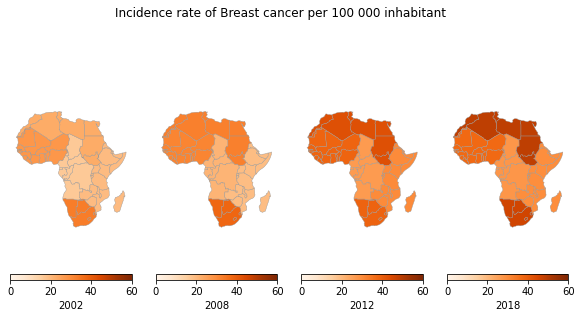

In [24]:
cmap = cm.get_cmap('YlGn')
#cmap = cm.get_cmap('winter')
#cmap = cm.get_cmap('tab20c')
#cmap = cm.get_cmap('Greens')
#cmap = cm.get_cmap('tab20c')
#cmap = cm.get_cmap('Set2')
#from cartopy import crs as ccrs
# Generate a figure with two axes, one for CartoPy, one for GeoPandas

vmin, vmax =0, 60
cmap = cm.get_cmap('Oranges')

fig, axs = plt.subplots(1,4,figsize=(10, 5), sharex=True, sharey=True)
fig.suptitle('Incidence rate of Breast cancer per 100 000 inhabitant')
# Make the CartoPy plot
line1 = africa.plot(column="Breast2002", cmap=cmap, legend=True, linewidth=0.4, ax=axs[0], edgecolor='0.6',
            legend_kwds={'label': "2002", 'orientation': "horizontal"}, vmin=vmin, vmax=vmax)

line2 = africa.plot(column="Breast2008", cmap=cmap, legend=True, linewidth=0.4, ax=axs[1], edgecolor='0.6',
            legend_kwds={'label': "2008", 'orientation': "horizontal"}, vmin=vmin, vmax=vmax)

line3 = africa.plot(column="Breast2012", cmap=cmap, legend=True, linewidth=0.4, ax=axs[2], edgecolor='0.6',
            legend_kwds={'label': "2012", 'orientation': "horizontal"}, vmin=vmin, vmax=vmax)

line4 = africa.plot(column="Breast2018", cmap=cmap, legend=True, linewidth=0.4, ax=axs[3], edgecolor='0.6',
            legend_kwds={'label': "2018", 'orientation': "horizontal"}, vmin=vmin, vmax=vmax)
#plt.colorbar(label='log$_{10}$(population)')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[3].axis('off')
#plt.savefig('Figures/breast1.png')
plt.show()

In [25]:
cancer

,2002,2008,2012,2018
North,23.2,32.7,43.2,48.9
West,27.8,31.8,38.6,37.3
Central,16.5,21.3,26.8,27.9
East,19.5,19.3,30.4,29.9
South,33.4,38.1,38.9,46.2


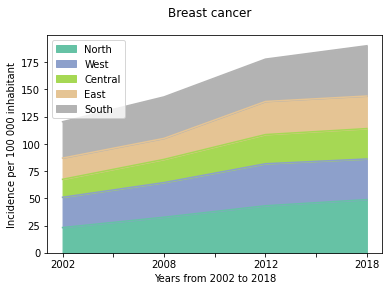

In [26]:
cmap = cm.get_cmap('Set2')
cancer.transpose().plot.area(cmap=cmap)
plt.suptitle('Breast cancer')
plt.ylabel('Incidence per 100 000 inhabitant')
plt.xlabel('Years from 2002 to 2018')
#plt.savefig('Figures/breast2.png')
plt.show()

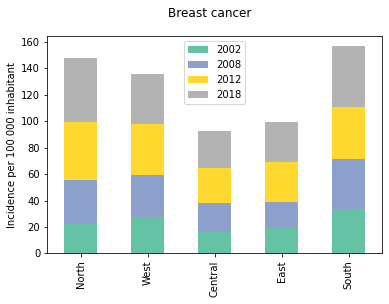

In [27]:
cancer.plot(kind='bar', stacked=True, cmap=cmap)
plt.suptitle('Breast cancer')
plt.ylabel('Incidence per 100 000 inhabitant')
#plt.savefig('Figures/breast3.png')
plt.show()

In [28]:
fat

,2002,2008,2012,2018
North,71.982759,54.434251,40.277778,37.627812
West,70.503597,59.748428,52.072539,47.721180
Central,73.333333,61.502347,55.597015,56.630824
East,72.307692,59.067358,51.315789,51.505017
South,48.802395,50.656168,39.845758,33.766234


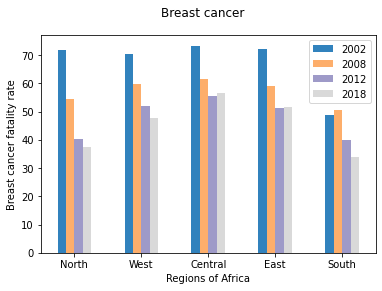

In [29]:
#cmap = cm.get_cmap('YlGn')
#cmap = cm.get_cmap('winter')
cmap = cm.get_cmap('tab20c')#cmap = cm.get_cmap('Spectral')
#cmap = cm.get_cmap('Set2')
#cmap = cm.get_cmap('inferno')
#cmap = cm.get_cmap('viridis')
fat.plot.bar(rot=0, cmap=cmap)
plt.xlabel('Regions of Africa')
plt.suptitle('Breast cancer')
plt.ylabel('Breast cancer fatality rate')
#plt.savefig('Figures/breast4.png')
plt.show()